<a href="https://colab.research.google.com/github/rajput-prince/web/blob/main/catsvsdogs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!mkdir  -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [2]:
!kaggle datasets download -d salader/dogs-vs-cats

 99% 1.06G/1.06G [00:11<00:00, 132MB/s]
100% 1.06G/1.06G [00:11<00:00, 95.7MB/s]


In [3]:
import zipfile
zip_ref = zipfile.ZipFile('/content/dogs-vs-cats.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

In [42]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,BatchNormalization,Dropout

In [5]:
train_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/train',
    labels = 'inferred',
    label_mode = 'int',
    batch_size=32,
    image_size=(256,256)
)

validation_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/test',
    labels = 'inferred',
    label_mode = 'int',
    batch_size=32,
    image_size=(256,256)
)

Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


In [6]:
#normalize
def process(image,label):
  image = tf.cast(image/255. ,tf.float32)
  return image,label

train_ds = train_ds.map(process)
validation_ds = validation_ds.map(process)

In [44]:
#create cnn model

model = Sequential()

model.add(Conv2D(32,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(256,256,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(64,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(128,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Flatten())

model.add(Dense(128,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(1,activation='sigmoid'))

In [45]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_5 (Conv2D)           (None, 254, 254, 32)      896       
                                                                 
 batch_normalization (Batch  (None, 254, 254, 32)      128       
 Normalization)                                                  
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 127, 127, 32)      0         
 g2D)                                                            
                                                                 
 conv2d_6 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 batch_normalization_1 (Bat  (None, 125, 125, 64)      256       
 chNormalization)                                                
                                                      

In [46]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [47]:
history = model.fit(train_ds,epochs=10,validation_data=validation_ds)

Epoch 1/10
625/625 [==============================] - 69s 104ms/step - loss: 1.3365 - accuracy: 0.5908 - val_loss: 0.6099 - val_accuracy: 0.6740
Epoch 2/10
625/625 [==============================] - 67s 107ms/step - loss: 0.6202 - accuracy: 0.6738 - val_loss: 0.5835 - val_accuracy: 0.6894
Epoch 3/10
625/625 [==============================] - 67s 107ms/step - loss: 0.5603 - accuracy: 0.7173 - val_loss: 0.5164 - val_accuracy: 0.7604
Epoch 4/10
625/625 [==============================] - 68s 108ms/step - loss: 0.5047 - accuracy: 0.7504 - val_loss: 0.4937 - val_accuracy: 0.7588
Epoch 5/10
625/625 [==============================] - 64s 102ms/step - loss: 0.4625 - accuracy: 0.7814 - val_loss: 0.5694 - val_accuracy: 0.6938
Epoch 6/10
625/625 [==============================] - 67s 107ms/step - loss: 0.4230 - accuracy: 0.8037 - val_loss: 0.4928 - val_accuracy: 0.7616
Epoch 7/10
625/625 [==============================] - 67s 107ms/step - loss: 0.3686 - accuracy: 0.8323 - val_loss: 0.4984 - val_ac

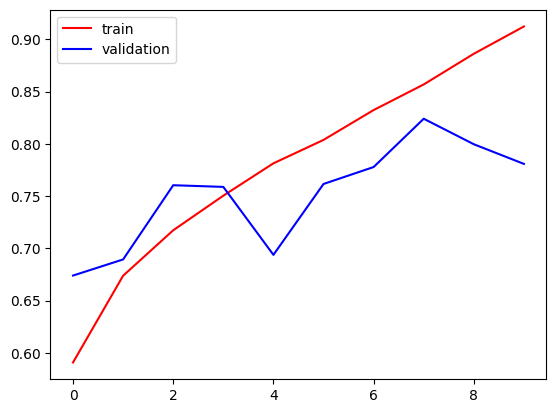

In [48]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

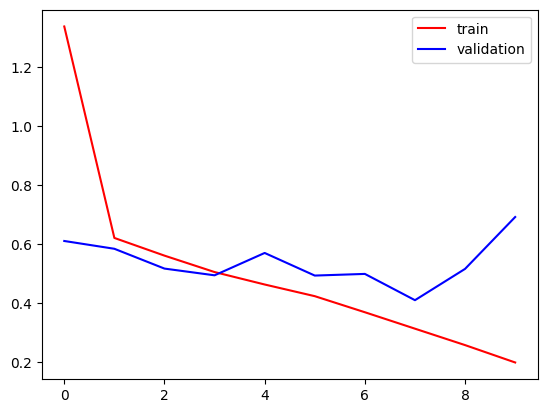

In [49]:
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()

In [50]:
import cv2

In [51]:
test_img= cv2.imread('/content/dog1.jpg')

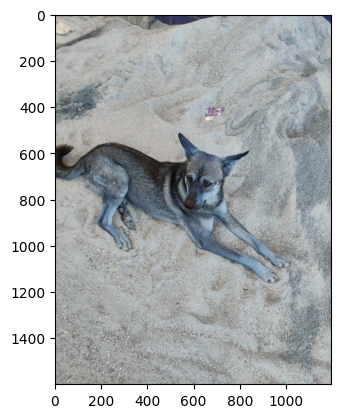

In [52]:
plt.imshow(test_img)

In [53]:
test_img.shape

(1600, 1197, 3)

In [54]:
test_img=cv2.resize(test_img,(256,256))

In [55]:
test_input= test_img.reshape((1,256,256,3))

In [56]:
model.predict(test_input)

1/1 [==============================] - 0s 107ms/step


array([[0.]], dtype=float32)

In [57]:
test_img= cv2.imread('/content/cat.jpg')

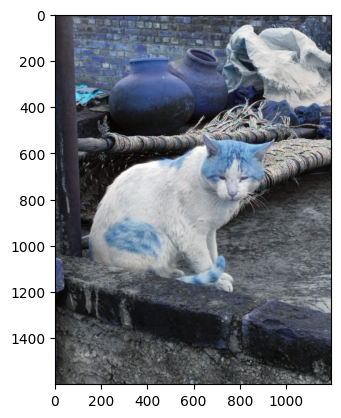

In [58]:
plt.imshow(test_img)

In [59]:
test_img.shape

(1600, 1197, 3)

In [60]:
test_img=cv2.resize(test_img,(256,256))

In [61]:
test_input= test_img.reshape((1,256,256,3))

In [62]:
model.predict(test_input)

1/1 [==============================] - 0s 18ms/step


array([[1.]], dtype=float32)

In [63]:
test_img= cv2.imread('/content/dog2.jpg')

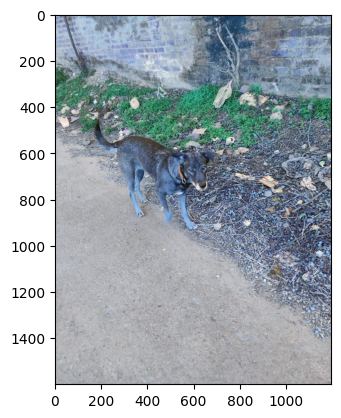

In [64]:
plt.imshow(test_img)

In [65]:
test_img.shape

(1600, 1197, 3)

In [66]:
test_img=cv2.resize(test_img,(256,256))

In [67]:
test_input= test_img.reshape((1,256,256,3))

In [68]:
model.predict(test_input)

1/1 [==============================] - 0s 22ms/step


array([[0.]], dtype=float32)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')